In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
# Cargar datos
data = np.loadtxt(os.path.join('corregido.csv'), delimiter=',')
X = data[:, :49]
y = data[:, 49]
m = y.size

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
       1    2558         1
       2   22325         0
       3     115         1
       4    1201         1
       5     312         0
       6      54         1
       7     116         1
       8      57         0
       9     188         1
      10      64         1


In [4]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [5]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.000000e+00 2.558000e+03 1.506090e+03 ... 3.324319e+04 6.574000e+01
  7.950000e+00]
 [2.000000e+00 2.232500e+04 7.911000e+01 ... 5.157204e+04 6.573000e+01
  6.260000e+00]
 [3.000000e+00 1.150000e+02 1.449850e+03 ... 3.169284e+04 6.581000e+01
  7.840000e+00]
 ...
 [2.020000e+02 1.400000e+01 2.514000e+01 ... 2.153050e+03 6.591000e+01
  6.120000e+00]
 [2.030000e+02 1.000000e+01 9.600000e+01 ... 2.421430e+03 6.597000e+01
  6.320000e+00]
 [2.040000e+02 1.100000e+01 7.730000e+00 ... 3.782680e+03 6.565000e+01
  6.260000e+00]]
Media calculada: [ 8.15880470e+01  3.32842049e+02  6.98707086e+02  8.70992209e+02
  8.41216649e+01  7.69696379e+05  4.32427215e+01  9.12788687e+00
  3.94071291e+03  2.21003202e-01  1.09892743e+02  2.51440768e-01
  3.11216649e-01  4.84663821e-01  1.82892209e-01  3.01931697e-01
  7.74125614e+01  3.11519210e+01  9.09039488e-01  2.28815368e-01
  2.89316969e-01  7.60856243e+01  0.00000000e+00  6.42177161e-01
  5.59910694e+02  5.78292423e-01  7.49819637e+00  6.08399146e-01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [6]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [7]:
print(X)

[[ 1.         -1.24092248  1.15238979 ...  3.68676672  0.38873035
  -0.05837721]
 [ 1.         -1.22552414 11.38954577 ...  6.36218073  0.38776948
  -0.6396642 ]
 [ 1.         -1.21012579 -0.11281849 ...  3.46046621  0.39545643
  -0.09621246]
 ...
 [ 1.          1.85414469 -0.1651255  ... -0.8513792   0.40506512
  -0.68781815]
 [ 1.          1.86954303 -0.16719707 ... -0.81220448  0.41083033
  -0.61902679]
 [ 1.          1.88494138 -0.16667918 ... -0.6135064   0.38008253
  -0.6396642 ]]


In [8]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


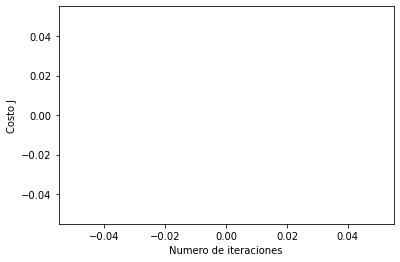

In [15]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(50)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,214.7,0.21,0.26,0.49,0.1,0.4,99.59,32.19,1.84,0.16,0.2,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.2,-3.71,-0.18,2.19,0,2.19,310,16110,0,138.68,89,69,2850,1000,763.16,135.46,3.73,0,33243.19,65.74,7.95]
X_array[1:50] = (X_array[1:50] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [19]:
X_array = [1, 1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,214.7,0.21,0.26,0.49,0.1,0.4,99.59,32.19,1.84,0.16,0.2,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.2,-3.71,-0.18,2.19,0,2.19,310,16110,0,138.68,89,69,2850,1000,763.16,135.46,3.73,0,33243.19,65.74,7.95]
X_array[1:3] = (X_array[1:50] - mu) / sigma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [20]:
X_array[1:50]

[-1.240922479683292,
 1.1523897918738535,
 1.3464340683429747,
 -0.793006948653837,
 0.12965707071601754,
 1.469090553133078,
 -0.18587106624101488,
 -0.34510730124788913,
 3.165389107548287,
 -0.3434597804446608,
 1.7061793810805443,
 -0.4704633114845127,
 -0.4221564441651356,
 0.02461985296629276,
 -0.9999204670529378,
 0.4793508481527986,
 0.07291195065514486,
 0.006802087104629673,
 1.3789325205970762,
 -0.9130315160655398,
 -0.8481317821372001,
 0.5044388152844844,
 nan,
 -0.5743355175735909,
 -0.6977750441264735,
 -0.838283111947657,
 -0.937553846686005,
 -0.45976885121951155,
 -0.29609335545322607,
 -0.5438603229765513,
 1.1548341837413687,
 0.5724022277637814,
 -0.05689100576111081,
 0.5725910223203253,
 2.8061741423550552,
 2.6218863548485793,
 -1.2924446774667104,
 3.4033899255155657,
 -0.0996677866141508,
 0.611105155141036,
 1.9138767322588557,
 0.8005966041974779,
 0.9507567983147716,
 0.21651416065725976,
 -0.2554482580667034,
 -0.3832477331562431,
 3.6867667246513585,
 0